(1, 128, 128)


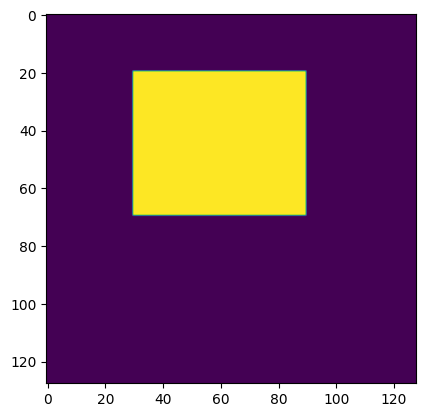

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from skimage import draw
import torch

def plot2d(data):
    plt.imshow(data)
    plt.show()

def plot3d(data):
    fig = plt.figure(figsize=(40, 40))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.02)
    for ax, im in zip(grid, data):
        ax.imshow(im)
    plt.show()

input_data = np.zeros((128, 128), dtype=np.int16)
start = (20, 30)
extent = (50, 60)
rr, cc = draw.rectangle(start, extent=extent, shape=input_data.shape)
# rr, cc = draw.circle_perimeter(14, 14, radius=10, shape=input_data.shape)
input_data[rr, cc] = 1
# input_data = images[2][35].pixel_array.astype(np.int16)
input_data = np.expand_dims(input_data, axis=0)
print(input_data.shape)
plot2d(input_data[0])

torch.Size([1, 128, 128])
torch.Size([3, 60, 60])
(3, 60, 60)


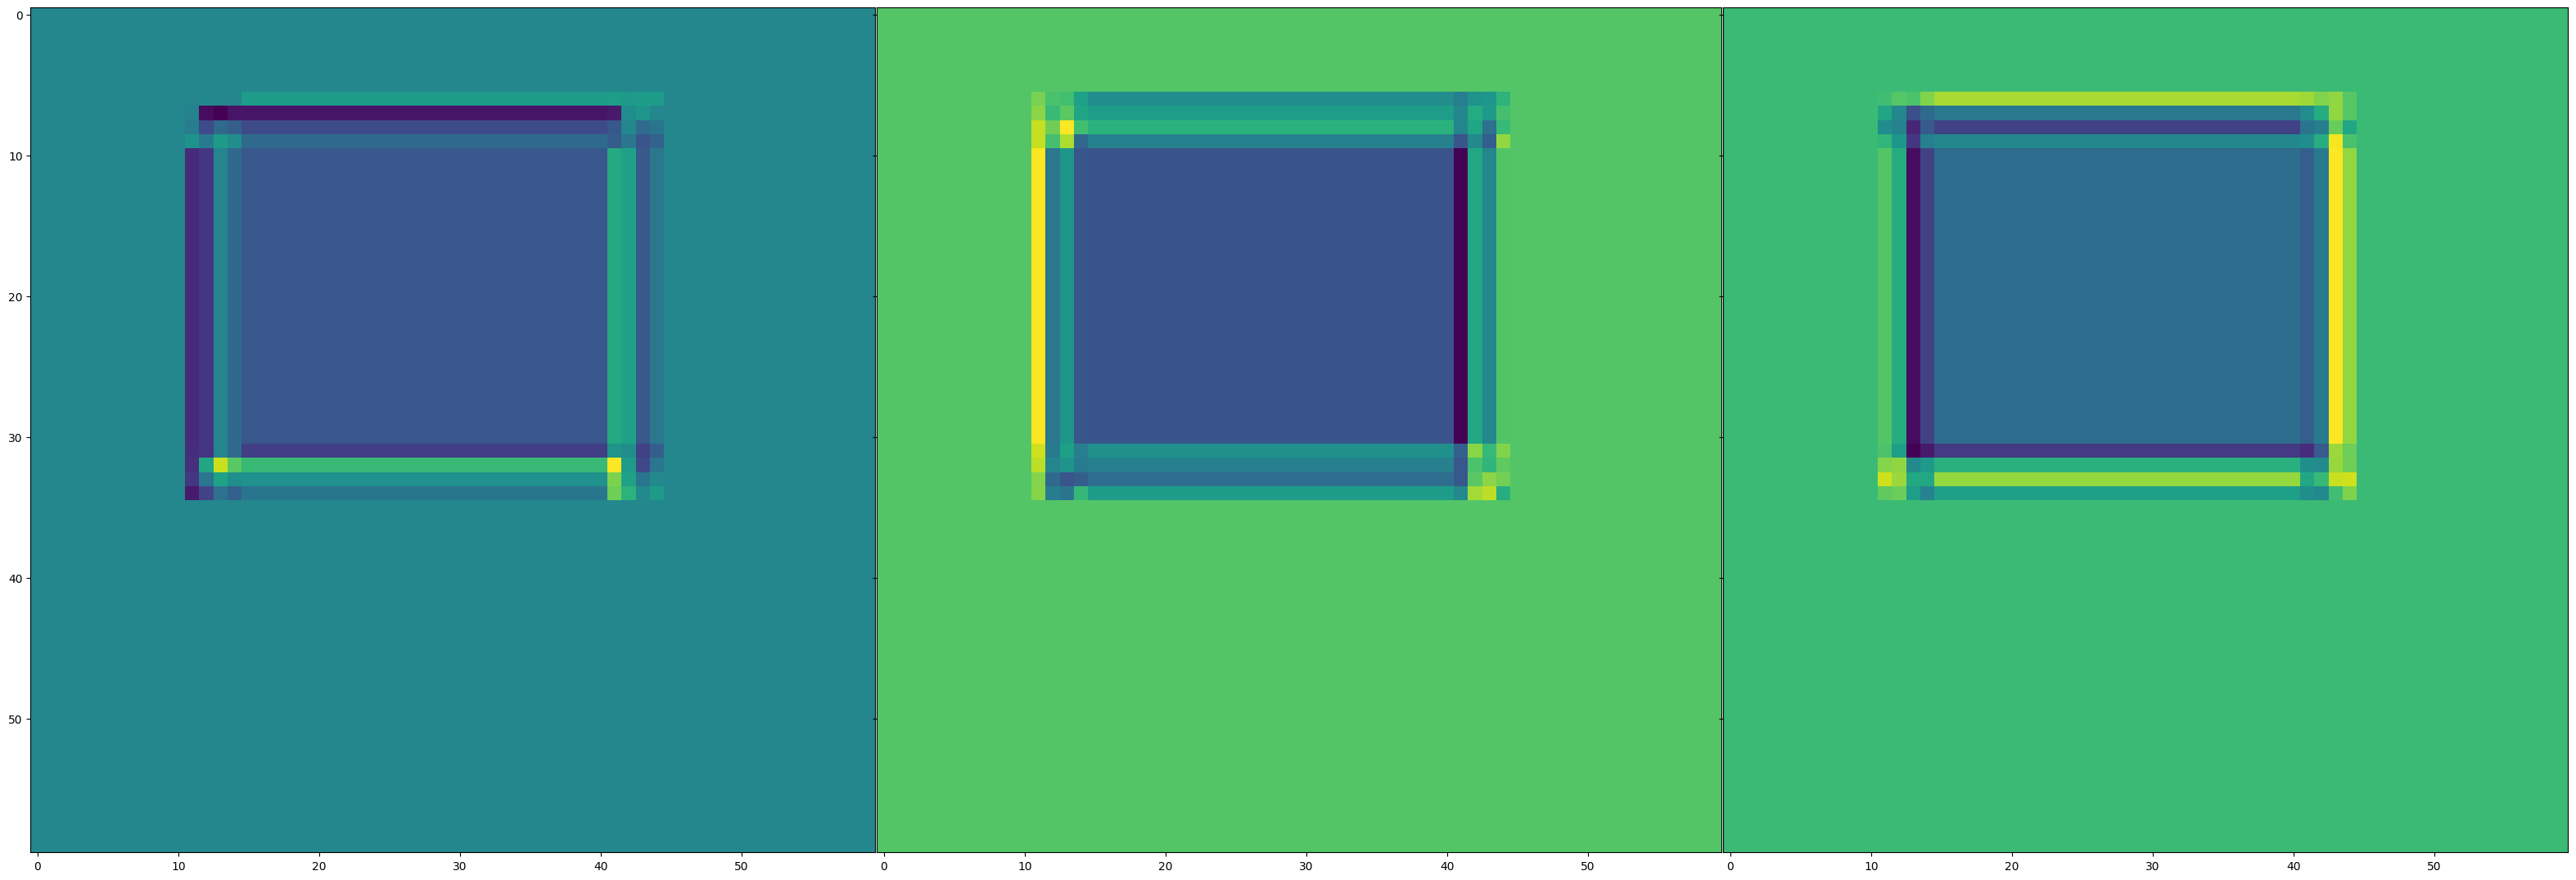

In [ ]:
from torch import nn

conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(9, 9), stride=2)
input_tensor = torch.from_numpy(input_data).to(torch.float32)
print(input_tensor.size())
output_tensor = conv1(input_tensor)
print(output_tensor.size())
np_out = output_tensor.detach().numpy()
print(np_out.shape)
plot3d(np_out)

(1, 320, 320)


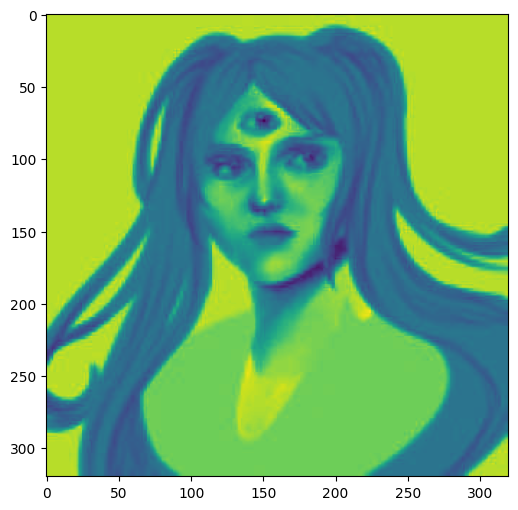

In [ ]:
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import torch

img = Image.open('Practice2HW.jpg')
img = np.array(img.convert('L'))

def plot2d(data):
    plt.imshow(data)
    plt.show()

def plot3d(data):
    fig = plt.figure(figsize=(40, 40))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.02)
    for ax, im in zip(grid, data):
        ax.imshow(im)
    plt.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.imshow(img)

img = np.expand_dims(img, axis=0)

print(img.shape)
plt.show()

torch.Size([1, 320, 320])
torch.Size([1, 312, 312])
(1, 312, 312)


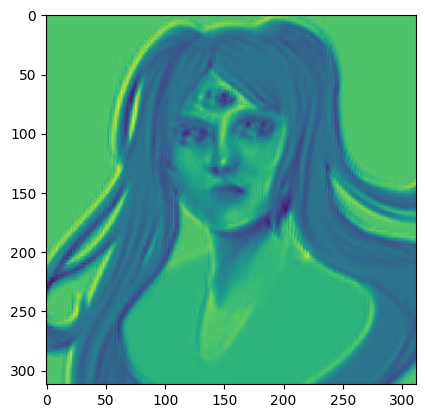

In [ ]:
from torch import nn

conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(9, 9), stride=1)
input_tensor = torch.from_numpy(img).to(torch.float32)
print(input_tensor.size())
output_tensor = conv1(input_tensor)
print(output_tensor.size())
np_out = output_tensor.detach().numpy()
print(np_out.shape)
plot2d(np_out.reshape(312, 312))